# Klein-Nishina


In this notebook we show the working of the OSIRIS Compton binary collision module implemented in [del Gaudio 2020 JPP](https://www.cambridge.org/core/journals/journal-of-plasma-physics/article/abs/compton-scattering-in-particleincell-codes/4A2BE5F3AB821F6B7D45E36CC0FBB48F). Electrons are initially at rest, and the photon incides with an energy varying from 2.75 eV to 10 MeV.


Wikipedia article: https://en.wikipedia.org/wiki/Klein%E2%80%93Nishina_formula#

Notebook by: Óscar Amaro (2023)

In [2]:
import numpy as np
from numpy import exp, sin, cos, sqrt, log10, log, pi, arctan, tan
import pandas as pd
import glob as glob
import h5py
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import fsolve
from scipy.constants import alpha, electron_mass, elementary_charge, hbar, speed_of_light
mGeV = electron_mass*speed_of_light**2/elementary_charge * 1e-9
from scipy.special import kv
# progress bar
from tqdm.notebook import tqdm
from tqdm import trange

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
        returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

def PDFkn(th, r):
    x = 1 + 0.999689 * r - 0.999689*r*cos(th)
    return (x**2+1-x*sin(th)**2)/x**3

### OSIRIS Klein-Nishina module

Dashed-line: theory, full-line: OSIRIS distributions

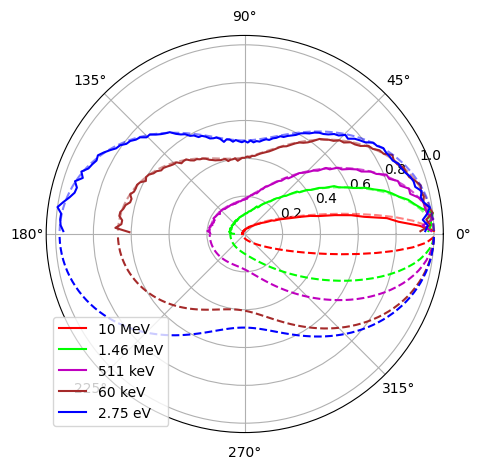

In [3]:
thlst = np.linspace(0,pi,100)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) #

mkeV=0.511
files = glob.glob('osiris/KN/KNgg10M_off/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])
indxs = (p2dist!=0) * (p3dist!=0)
qdist = qdist[indxs]
p1dist = p1dist[indxs]; p2dist = p2dist[indxs]; p3dist = p3dist[indxs]
thdist = np.arctan2(sqrt(p2dist**2 + p3dist**2 ), p1dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist/sin(thdist))
ytmp, xtmp = ytmp, arraycenter(xtmp)
y2=PDFkn(xtmp, 10/mkeV)
ax.plot(xtmp, y2/np.max(y2), 'r--', alpha=0.5)
ax.plot(xtmp, ytmp/np.max(ytmp), 'r', label=r'10 MeV')
ax.plot(-xtmp, y2/np.max(y2), 'r--')

files = glob.glob('osiris/KN/KNgg1.46M_off/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])
indxs = (p2dist!=0) * (p3dist!=0)
qdist = qdist[indxs]
p1dist = p1dist[indxs]; p2dist = p2dist[indxs]; p3dist = p3dist[indxs]
thdist = np.arctan2(sqrt(p2dist**2 + p3dist**2 ), p1dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist/sin(thdist))
ytmp, xtmp = ytmp, arraycenter(xtmp)
y2=PDFkn(xtmp, 1.46/mkeV)
ax.plot(xtmp, y2/np.max(y2), '--', color='lime', alpha=0.5)
ax.plot(xtmp, ytmp/np.max(ytmp), color='lime', label=r'1.46 MeV')
ax.plot(-xtmp, y2/np.max(y2), '--', color='lime')

files = glob.glob('osiris/KN/KNgg511k_off/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])
indxs = (p2dist!=0) * (p3dist!=0)
qdist = qdist[indxs]
p1dist = p1dist[indxs]; p2dist = p2dist[indxs]; p3dist = p3dist[indxs]
thdist = np.arctan2(sqrt(p2dist**2 + p3dist**2 ), p1dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist/sin(thdist))
ytmp, xtmp = ytmp, arraycenter(xtmp)
y2=PDFkn(xtmp, 0.511/mkeV)
ax.plot(xtmp, y2/np.max(y2), 'm--', alpha=0.7)
ax.plot(xtmp, ytmp/np.max(ytmp), 'm', label=r'511 keV')
ax.plot(-xtmp, y2/np.max(y2), 'm--')

files = glob.glob('osiris/KN/KNgg060k_off/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])
indxs = (p2dist!=0) * (p3dist!=0)
qdist = qdist[indxs]
p1dist = p1dist[indxs]; p2dist = p2dist[indxs]; p3dist = p3dist[indxs]
thdist = np.arctan2(sqrt(p2dist**2 + p3dist**2 ), p1dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist/sin(thdist))
ytmp, xtmp = ytmp, arraycenter(xtmp)
y2=PDFkn(xtmp, 0.06/mkeV) #/0.511
ax.plot(xtmp, y2/np.max(y2), '--', color='brown', alpha=0.5)
ax.plot(xtmp, ytmp/np.max(ytmp), color='brown', label=r'60 keV')
ax.plot(-xtmp, y2/np.max(y2), '--', color='brown')

files = glob.glob('osiris/KN/KNgg2.75_off/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])
indxs = (p2dist!=0) * (p3dist!=0)
qdist = qdist[indxs]
p1dist = p1dist[indxs]; p2dist = p2dist[indxs]; p3dist = p3dist[indxs]
thdist = np.arctan2(sqrt(p2dist**2 + p3dist**2 ), p1dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist/sin(thdist))
ytmp, xtmp = ytmp, arraycenter(xtmp)
y2=PDFkn(xtmp, 2.75e-3/mkeV)
ax.plot(xtmp, y2/np.max(y2), '--', color='blue', alpha=0.5)
ax.plot(xtmp, ytmp/np.max(ytmp), color='blue', label=r'2.75 eV')
ax.plot(-xtmp, y2/np.max(y2), '--', color='blue')

ax.legend()
# aspect
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
#axesratio = (ymax-ymin)/(xmax-xmin)
axesratio = (ymax-ymin)/(np.log10(xmax)-np.log10(xmin))
#axes.set_aspect(aspect=1/axesratio)
ax.set_aspect(aspect=1)
plt.tight_layout()
#plt.savefig('KNgg_off.pdf', transparent=True)
plt.show()

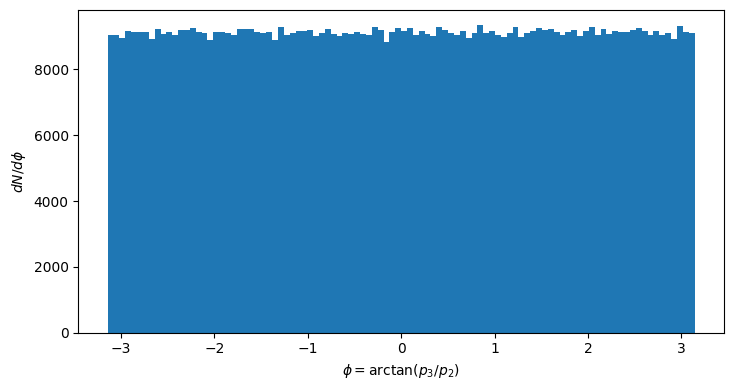

In [4]:
# azimuthal angle is uniformly sampled in [-pi, pi]

fig, ax = plt.subplots(figsize=(8,4)) #

plt.hist(np.arctan2(p3dist, p2dist), 100)
plt.xlabel(r'$\phi = \mathrm{arctan}(p_3/p_2)$')
plt.ylabel(r'$dN/d\phi$')

# aspect
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
#axesratio = (ymax-ymin)/(xmax-xmin)
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=0.5/axesratio)
#ax.set_aspect(aspect=2)
plt.tight_layout()
#plt.savefig('KNgg_off_azimuthal.pdf', transparent=True)
plt.show()

# Sampling the KN cross-section

In [5]:
# analytical expressions for the KN PDF and CDF

def PDFkn(th, r):
    x = 1 + 0.999689 * r - 0.999689*r*cos(th)
    return (x**2+1-x*sin(th)**2)/x**3

def CDFkn(th, r):
    x1 = 1 + 1.99938*r
    
    res = 0.31831*x1**(5/2)* (2*th + 2*(-2 - 9.99689*r - 11.9925*r**2 + 3.99627*r**3 + 10.9863*r**4)*arctan(sqrt(x1)*tan(th/2))/(x1**(5/2)) + \
                        + 0.999067*r**3*sin(th)/(x1*(1 + 0.999689*r - 0.999689*r*cos(th))**2) + 
                       -(0.999689*r*(2 + 7.99751*r + 10.9932*r**2 + 2.9972*r**3)*sin(th))/(x1**2 * (-1 - 0.999689*r + 0.999689*r*cos(th) ))
                       ) / (-2 - 9.99689*r - 11.9925*r**2 + 3.99627*r**3 + 10.9863*r**4 + 
 2*x1**(5/2))
    return res

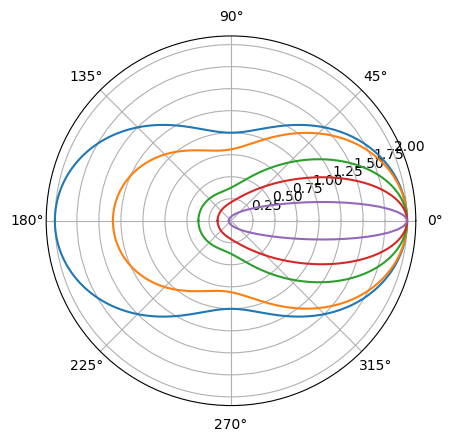

In [6]:
etadim = 300
thlst = np.linspace(-pi,pi, etadim)
rlst = np.logspace(np.log10(2e4/511e3), np.log10(1e8/511e3), etadim)

X, Y = np.meshgrid(thlst, rlst)
dPlst = np.zeros((etadim,etadim))
dPlst_norm = np.zeros_like(dPlst)
dPlst = PDFkn(X,Y)
dPlstCDF_norm = np.zeros_like(dPlst)
dPlstCDF = CDFkn(X,Y)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) #
plt.plot(thlst, PDFkn(thlst, 2.75/511e3))
plt.plot(thlst, PDFkn(thlst, 6e4/511e3))
plt.plot(thlst, PDFkn(thlst, 1))
plt.plot(thlst, PDFkn(thlst, 1.46e6/511e3))
plt.plot(thlst, PDFkn(thlst, 1e7/511e3))
plt.show()

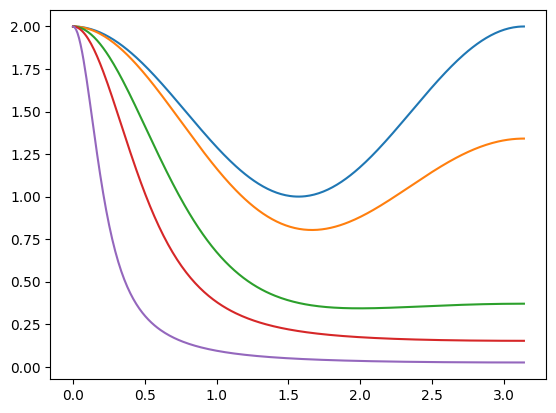

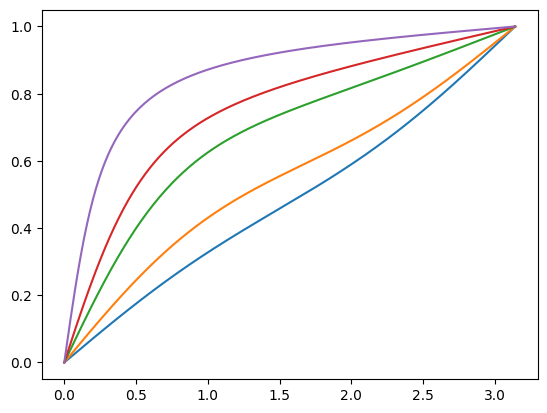

In [7]:
etadim = 300
thlst = np.linspace(0,pi, etadim)
rlst = np.logspace(np.log10(2e4/511e3), np.log10(1e8/511e3), etadim)

plt.plot(thlst, PDFkn(thlst, 2.75/511e3))
plt.plot(thlst, PDFkn(thlst, 6e4/511e3))
plt.plot(thlst, PDFkn(thlst, 1))
plt.plot(thlst, PDFkn(thlst, 1.46e6/511e3))
plt.plot(thlst, PDFkn(thlst, 1e7/511e3))
plt.show()

y1 = CDFkn(thlst, 2.75/511e3)
y2 = CDFkn(thlst, 6e4/511e3)
y3 = CDFkn(thlst, 1)
y4 = CDFkn(thlst, 1.46e6/511e3)
y5 = CDFkn(thlst, 1e7/511e3)
plt.plot(thlst, y1/y1[-1] )
plt.plot(thlst, y2/y2[-1] )
plt.plot(thlst, y3/y3[-1] )
plt.plot(thlst, y4/y4[-1] )
plt.plot(thlst, y5/y5[-1] )
plt.show()

In [8]:
# the iCDF requires numerically inverting the CDF (finding a root)
def iCDFkn(u, r):
    r = fsolve(lambda th: CDFkn(th, r)-u, 0.5)[0]
    return r
iCDFkn = np.vectorize(iCDFkn)

etadim = 300
thlst = np.linspace(0,pi, etadim)
rlst = np.logspace(np.log10(2e4/511e3), np.log10(1e8/511e3), etadim)

X, Y = np.meshgrid(thlst, rlst)
dPlst = np.zeros((etadim,etadim))
dPlst_norm = np.zeros_like(dPlst)
dPlst = PDFkn(X,Y)
dPlstCDF_norm = np.zeros_like(dPlst)
dPlstCDF = CDFkn(X,Y)

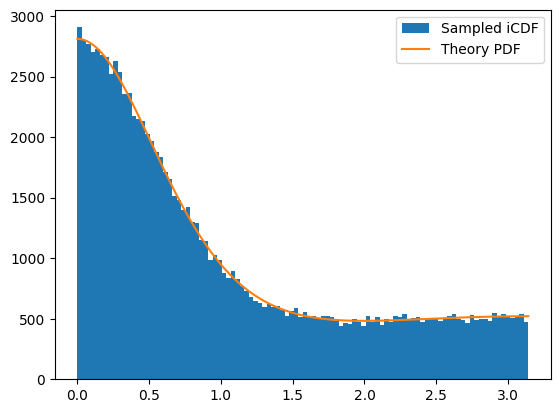

In [9]:
# we can now sample the angular distribution of the KN process through the iCDF
r = 1
Nsmpl = int(1e5)

u_dist = np.random.uniform(0, 1, Nsmpl)
thdist = iCDFkn(u_dist, r)

thlst = np.linspace(0,pi, etadim)
nbins = 100
plt.hist(thdist, nbins, label=r'Sampled iCDF')
y = PDFkn(thlst, r)
plt.plot(thlst, y/np.trapz(y,thlst)*pi * Nsmpl/nbins, '-', label=r'Theory PDF' )
plt.legend()
plt.show()

### Contour plots of the KN PDF and CDF

In [10]:
etadim = 300
thlst = np.linspace(0,pi, etadim)
rlst = np.logspace(np.log10(2e4/511e3), np.log10(1e8/511e3), etadim)

X, Y = np.meshgrid(thlst, rlst)
dPlst = np.zeros((etadim,etadim))
dPlst_norm = np.zeros_like(dPlst)
dPlst = PDFkn(X,Y)
dPlstCDF_norm = np.zeros_like(dPlst)
dPlstCDF = CDFkn(X,Y)

# normalize PDF
for i in range(etadim):
    locmax = np.max(dPlst[i,:])
    #locmax = dPlst[i,0]
    if locmax > 0:
        dPlst_norm[i,:] = dPlst[i,:]/locmax
        
# remove nan
dPlst[np.isnan(dPlst)]=0
dPlst_norm[np.isnan(dPlst_norm)]=0

# normalize CDF
for i in range(etadim):
    locmax = np.max(dPlstCDF[i,:])
    #locmax = dPlst[i,0]
    if locmax > 0:
        dPlstCDF_norm[i,:] = dPlstCDF[i,:]/locmax
        
# remove nan
dPlst[np.isnan(dPlstCDF)]=0
dPlst_norm[np.isnan(dPlstCDF_norm)]=0

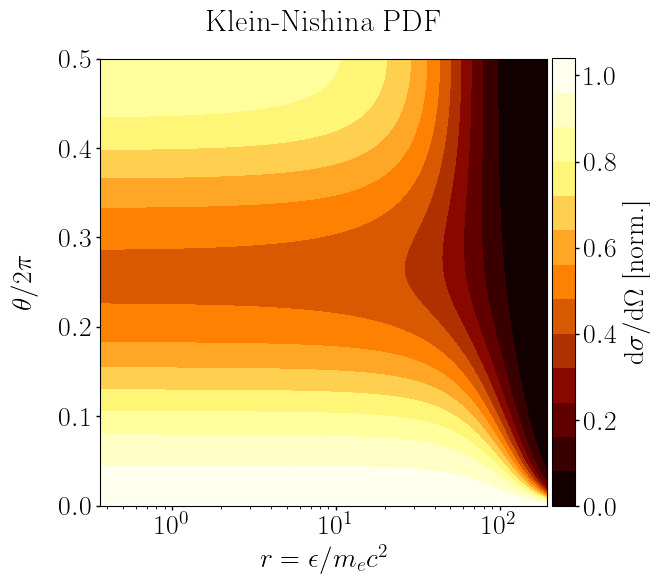

In [11]:
fractionbar = 0.1*0.355*1.33
plt.style.use("style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axes.contour(dPlst_norm.T, [0.99999], colors = 'w', origin='lower', extent=[np.min(rlst), np.max(rlst), np.min(thlst/(2*pi)), np.max(thlst/(2*pi))] )
im0 = axes.contourf(dPlst_norm.T, 15, origin='lower', extent=[np.min(rlst), np.max(rlst), np.min(thlst/(2*pi)), np.max(thlst/(2*pi))], cmap=plt.cm.get_cmap('afmhot') )

chi_trans = 2.7

axes.set_xlabel(r'$r=\epsilon/m_ec^2$')
axes.set_xscale('log')
axes.set_ylabel(r'$\theta/2\pi$',labelpad=15)
axes.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
#
cbar0 = fig.colorbar(im0, ax=axes, fraction=fractionbar, pad=0.01)
cbar0.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar0.set_label(r'$\mathrm{d}\sigma/ \mathrm{d}\Omega$ [norm.]',labelpad=1.4*3,y=0.5)

axes.set_title(r'Klein-Nishina PDF')

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(np.log10(xmax)-np.log10(xmin))
axes.set_box_aspect(aspect=1)

plt.tight_layout()
#plt.savefig('differential_rate_KN_PDF.pdf')
plt.show()

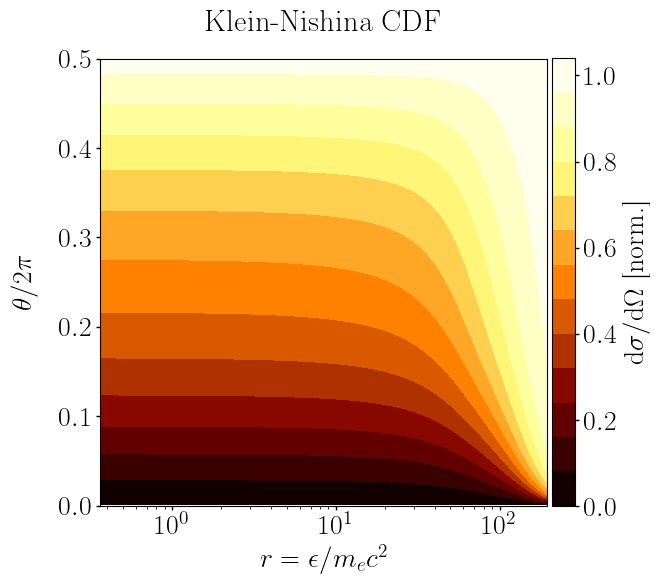

In [12]:
fractionbar = 0.1*0.355*1.33
plt.style.use("style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axes.contour(dPlstCDF_norm.T, [0.99999], colors = 'w', origin='lower', extent=[np.min(rlst), np.max(rlst), np.min(thlst/(2*pi)), np.max(thlst/(2*pi))] )
im0 = axes.contourf(dPlstCDF_norm.T, 15, origin='lower', extent=[np.min(rlst), np.max(rlst), np.min(thlst/(2*pi)), np.max(thlst/(2*pi))], cmap=plt.cm.get_cmap('afmhot') )

chi_trans = 2.7

axes.set_xlabel(r'$r=\epsilon/m_ec^2$')
axes.set_xscale('log')
axes.set_ylabel(r'$\theta/2\pi$',labelpad=15)
axes.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
#
cbar0 = fig.colorbar(im0, ax=axes, fraction=fractionbar, pad=0.01)
cbar0.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar0.set_label(r'$\mathrm{d}\sigma/ \mathrm{d}\Omega$ [norm.]',labelpad=1.4*3,y=0.5)

axes.set_title(r'Klein-Nishina CDF')

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(np.log10(xmax)-np.log10(xmin))
axes.set_box_aspect(aspect=1)

plt.tight_layout()
#plt.savefig('differential_rate_KN_CDF.pdf')
plt.show()